# **Project-Based Assignment CLO 2 Machine Learning**

Topik : Dataset of classified for apartments for rent in USA

Anggota :
1. Afra Mahendra Prasetyawati (1301213170)
2. Diah Ayu Lestari (1301210549)
3. Kayyisa Zulfa Mustafida (130121307)

## **Latar Belakang**

Pada project CLO 2-Regresi, kami mendapatkan "Dataset of classified for apartments for rent in USA". Pada dataset ini beirisikan informasi mengenai apartemen yang tersedia untuk disewa di berbagai wilayah Amerika Serikat. Dataset ini mencakup detail tentang lokasi, harga sewa, deskripsi gambar, informasi kontak tanggal posting, dan luas area apartemen.

Penggunaan jaringan saraf tiruan (ANN) pada "Dataset of classified for apartment for rent in USA" berguna untuk menganalisis luas area apartemen berdasarkan fitur-fitur lainnya yang tersedia di dataset




### **Import Library & Dataset**

In [ ]:
%pip install sweetviz

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import sweetviz as sv

In [ ]:
#Load data
df1 = pd.read_csv("apartments_for_rent_classified_100K.csv", sep=";", encoding='cp1252')
df1

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542.0,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500.0,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650.0,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820.0,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624.0,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,5509186459,housing/rent/apartment,$975 / One BR - Great Deal. MUST SEE. Washer/D...,"Square footage: 855 sq-ft, unit number: 1327. ...","Gym,Patio/Deck,Playground,Pool,Storage,Tennis,...",1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,855.0,NaN,Marietta,GA,34.0007,-84.4665,RentDigs.com,1.568778e+09
8095,5509185760,housing/rent/apartment,This Apartment is a must see!,"Welcome Home Apartments in Absecon, NJ! Featur...","AC,Parking,Pool,Tennis",2.0,2.0,USD,No,Yes,...,"$1,285",Monthly,1175.0,NaN,Absecon,NJ,39.4432,-74.5117,RentDigs.com,1.568778e+09
8096,5509182836,housing/rent/apartment,Three Spacious BR in Marietta,"Manicured pathways, amazing landscaping and ch...","Gym,Playground,Pool",2.0,3.0,USD,No,Yes,...,"$1,429",Monthly,1353.0,NaN,Marietta,GA,34.0007,-84.4665,RentDigs.com,1.568778e+09
8097,5509182777,housing/rent/apartment,"Lease Spacious 2+2. Approx 1,610 sf of Living ...",luxurious Apartments in the Heart of Cobb Coun...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,"$1,400",Monthly,1610.0,NaN,Marietta,GA,34.0007,-84.4665,RentDigs.com,1.568778e+09


### **Ringkasan Metode**

Pada pemodelan metodenya, kami menggunakan jaringan saraf tiruan (ANN) karena datanya terdiri dari data numerik dan data kategorik serta memiliki dimensi yang luas.

### **Data Preprocessing**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8099 non-null   int64  
 1   category       8099 non-null   object 
 2   title          8099 non-null   object 
 3   body           8099 non-null   object 
 4   amenities      4705 non-null   object 
 5   bathrooms      8064 non-null   float64
 6   bedrooms       8092 non-null   float64
 7   currency       8098 non-null   object 
 8   fee            8098 non-null   object 
 9   has_photo      8098 non-null   object 
 10  pets_allowed   7439 non-null   object 
 11  price          8097 non-null   float64
 12  price_display  8097 non-null   object 
 13  price_type     8098 non-null   object 
 14  square_feet    8098 non-null   float64
 15  address        6673 non-null   object 
 16  cityname       8021 non-null   object 
 17  state          8021 non-null   object 
 18  latitude

In [ ]:
df1.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,8.099000e+03,8064.000000,8092.000000,8097.000000,8098.000000,8088.000000,8088.000000,8.098000e+03
mean,5.650253e+09,1.369048,1.757415,1476.017414,948.560138,37.548958,-95.772525,1.576329e+09
std,4.790506e+07,0.636221,0.996273,1127.122805,715.902112,5.718204,15.255269,2.571304e+06
min,5.508655e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.664576e+09,1.000000,1.000000,919.000000,625.000000,33.053400,-101.797800,1.577015e+09
50%,5.668615e+09,1.000000,2.000000,1250.000000,784.000000,38.571450,-94.581700,1.577359e+09
75%,5.668629e+09,2.000000,2.000000,1689.000000,1100.000000,41.651500,-84.352100,1.577360e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.355900,1.577362e+09


In [ ]:
#menghapus fitur title, body, id, source, address, cityname, state, dan time
df1 = df1.drop('title', axis=1)
df1 = df1.drop('body', axis=1)
df1 = df1.drop('id', axis=1)
df1 = df1.drop('source', axis=1)
df1 = df1.drop('address', axis=1)
df1 = df1.drop('cityname', axis=1)
df1 = df1.drop('state', axis=1)
df1 = df1.drop('time', axis=1)

In [ ]:
#memeriksa fitur currency
list_currency = list(df1['currency'])
for i in list_currency:
  if i != "USD":
    print(i)

nan


In [ ]:
#drop currency karena semua dalam USD
df1 = df1.drop('currency', axis=1)

In [ ]:
#memeriksa fitur price_type
list_price_type = list(df1['price_type'])
for i in list_price_type:
  if i != "Monthly":
    print(i)

Weekly
Monthly|Weekly
nan


In [ ]:
#drop data yang price_typenya bukan monthly
df1 = df1[df1['price_type'] != "monthly"]

In [ ]:
#drop fitur price_type
df1 = df1.drop('price_type', axis=1)

In [ ]:
#memeriksa variansi
column_names = list(df1.columns)
for i in column_names:
  if (df1[i].dtypes!="object"):
    print(df1[[i]].var())

bathrooms    0.404777
dtype: float64
bedrooms    0.99256
dtype: float64
price    1.270406e+06
dtype: float64
square_feet    512515.833421
dtype: float64
latitude    32.697854
dtype: float64
longitude    232.723236
dtype: float64


In [ ]:
  #memeriksa korelasi fitur
  correlation = df1.corr()
  print(correlation['square_feet'])

bathrooms      0.812553
bedrooms       0.585842
price          0.397862
square_feet    1.000000
latitude      -0.007974
longitude      0.019744
Name: square_feet, dtype: float64


<ipython-input-68-f9dd60d0ce80>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


In [ ]:
#drop fitur latitude dan longitude karena korelasi kecil
df1 = df1.drop('latitude', axis=1)
df1 = df1.drop('longitude', axis=1)

In [ ]:
#drop fitur price_display
df1 = df1.drop('price_display', axis=1)

In [ ]:
i = 0
for i in range(len(df1)) :
  if df1.loc[i, 'fee'] == "No" :
    df1.loc[i, 'fee'] = 0
  if df1.loc[i, 'fee'] == "Yes":
    df1.loc[i, 'fee'] = 1
df1


,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet
0,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,Cats,2195.0,542.0
1,housing/rent/apartment,NaN,1.5,3.0,0,Thumbnail,"Cats,Dogs",1250.0,1500.0
2,housing/rent/apartment,NaN,2.0,3.0,0,Thumbnail,None,1395.0,1650.0
3,housing/rent/apartment,NaN,1.0,2.0,0,Thumbnail,"Cats,Dogs",1600.0,820.0
4,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,"Cats,Dogs",975.0,624.0
...,...,...,...,...,...,...,...,...,...
8094,housing/rent/apartment,"Gym,Patio/Deck,Playground,Pool,Storage,Tennis,...",1.0,1.0,0,Thumbnail,NaN,975.0,855.0
8095,housing/rent/apartment,"AC,Parking,Pool,Tennis",2.0,2.0,0,Yes,NaN,1285.0,1175.0
8096,housing/rent/apartment,"Gym,Playground,Pool",2.0,3.0,0,Yes,NaN,1429.0,1353.0
8097,housing/rent/apartment,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,0,Yes,NaN,1400.0,1610.0


In [ ]:
#drop fee = nan
df1 = df1[df1['fee'] == 0]
df1

,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet
0,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,Cats,2195.0,542.0
1,housing/rent/apartment,NaN,1.5,3.0,0,Thumbnail,"Cats,Dogs",1250.0,1500.0
2,housing/rent/apartment,NaN,2.0,3.0,0,Thumbnail,None,1395.0,1650.0
3,housing/rent/apartment,NaN,1.0,2.0,0,Thumbnail,"Cats,Dogs",1600.0,820.0
4,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,"Cats,Dogs",975.0,624.0
...,...,...,...,...,...,...,...,...,...
8093,housing/rent/apartment,"Gym,Parking",1.0,1.0,0,Yes,NaN,1635.0,650.0
8094,housing/rent/apartment,"Gym,Patio/Deck,Playground,Pool,Storage,Tennis,...",1.0,1.0,0,Thumbnail,NaN,975.0,855.0
8095,housing/rent/apartment,"AC,Parking,Pool,Tennis",2.0,2.0,0,Yes,NaN,1285.0,1175.0
8096,housing/rent/apartment,"Gym,Playground,Pool",2.0,3.0,0,Yes,NaN,1429.0,1353.0


In [ ]:
#mereplace NaN price
df_med = df1['price'].median()
df1['price'] = df1['price'].fillna(df_med)
df1

<ipython-input-73-222155437cfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'].fillna(df_med)


,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet
0,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,Cats,2195.0,542.0
1,housing/rent/apartment,NaN,1.5,3.0,0,Thumbnail,"Cats,Dogs",1250.0,1500.0
2,housing/rent/apartment,NaN,2.0,3.0,0,Thumbnail,None,1395.0,1650.0
3,housing/rent/apartment,NaN,1.0,2.0,0,Thumbnail,"Cats,Dogs",1600.0,820.0
4,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,"Cats,Dogs",975.0,624.0
...,...,...,...,...,...,...,...,...,...
8093,housing/rent/apartment,"Gym,Parking",1.0,1.0,0,Yes,NaN,1635.0,650.0
8094,housing/rent/apartment,"Gym,Patio/Deck,Playground,Pool,Storage,Tennis,...",1.0,1.0,0,Thumbnail,NaN,975.0,855.0
8095,housing/rent/apartment,"AC,Parking,Pool,Tennis",2.0,2.0,0,Yes,NaN,1285.0,1175.0
8096,housing/rent/apartment,"Gym,Playground,Pool",2.0,3.0,0,Yes,NaN,1429.0,1353.0


In [ ]:
#mereplace NaN square_feet
df_med = df1['square_feet'].median()
df1['square_feet'] = df1['square_feet'].fillna(df_med)
df1

<ipython-input-74-b048753064c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['square_feet'] = df1['square_feet'].fillna(df_med)


,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet
0,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,Cats,2195.0,542.0
1,housing/rent/apartment,NaN,1.5,3.0,0,Thumbnail,"Cats,Dogs",1250.0,1500.0
2,housing/rent/apartment,NaN,2.0,3.0,0,Thumbnail,None,1395.0,1650.0
3,housing/rent/apartment,NaN,1.0,2.0,0,Thumbnail,"Cats,Dogs",1600.0,820.0
4,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,"Cats,Dogs",975.0,624.0
...,...,...,...,...,...,...,...,...,...
8093,housing/rent/apartment,"Gym,Parking",1.0,1.0,0,Yes,NaN,1635.0,650.0
8094,housing/rent/apartment,"Gym,Patio/Deck,Playground,Pool,Storage,Tennis,...",1.0,1.0,0,Thumbnail,NaN,975.0,855.0
8095,housing/rent/apartment,"AC,Parking,Pool,Tennis",2.0,2.0,0,Yes,NaN,1285.0,1175.0
8096,housing/rent/apartment,"Gym,Playground,Pool",2.0,3.0,0,Yes,NaN,1429.0,1353.0


In [ ]:
#mereplace NaN bathrooms
df_med = df1['bathrooms'].median()
df1['bathrooms'] = df1['bathrooms'].fillna(df_med)
df1

<ipython-input-75-9e7dfb4db14e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bathrooms'] = df1['bathrooms'].fillna(df_med)


,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet
0,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,Cats,2195.0,542.0
1,housing/rent/apartment,NaN,1.5,3.0,0,Thumbnail,"Cats,Dogs",1250.0,1500.0
2,housing/rent/apartment,NaN,2.0,3.0,0,Thumbnail,None,1395.0,1650.0
3,housing/rent/apartment,NaN,1.0,2.0,0,Thumbnail,"Cats,Dogs",1600.0,820.0
4,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,"Cats,Dogs",975.0,624.0
...,...,...,...,...,...,...,...,...,...
8093,housing/rent/apartment,"Gym,Parking",1.0,1.0,0,Yes,NaN,1635.0,650.0
8094,housing/rent/apartment,"Gym,Patio/Deck,Playground,Pool,Storage,Tennis,...",1.0,1.0,0,Thumbnail,NaN,975.0,855.0
8095,housing/rent/apartment,"AC,Parking,Pool,Tennis",2.0,2.0,0,Yes,NaN,1285.0,1175.0
8096,housing/rent/apartment,"Gym,Playground,Pool",2.0,3.0,0,Yes,NaN,1429.0,1353.0


In [ ]:
#mereplace NaN bedrooms
df_med = df1['bedrooms'].median()
df1['bedrooms'] = df1['bedrooms'].fillna(df_med)
df1

<ipython-input-76-a3f09b712832>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bedrooms'] = df1['bedrooms'].fillna(df_med)


,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet
0,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,Cats,2195.0,542.0
1,housing/rent/apartment,NaN,1.5,3.0,0,Thumbnail,"Cats,Dogs",1250.0,1500.0
2,housing/rent/apartment,NaN,2.0,3.0,0,Thumbnail,None,1395.0,1650.0
3,housing/rent/apartment,NaN,1.0,2.0,0,Thumbnail,"Cats,Dogs",1600.0,820.0
4,housing/rent/apartment,NaN,1.0,1.0,0,Thumbnail,"Cats,Dogs",975.0,624.0
...,...,...,...,...,...,...,...,...,...
8093,housing/rent/apartment,"Gym,Parking",1.0,1.0,0,Yes,NaN,1635.0,650.0
8094,housing/rent/apartment,"Gym,Patio/Deck,Playground,Pool,Storage,Tennis,...",1.0,1.0,0,Thumbnail,NaN,975.0,855.0
8095,housing/rent/apartment,"AC,Parking,Pool,Tennis",2.0,2.0,0,Yes,NaN,1285.0,1175.0
8096,housing/rent/apartment,"Gym,Playground,Pool",2.0,3.0,0,Yes,NaN,1429.0,1353.0


In [ ]:
#drop category karena semua data memiliki nilai yang sama
df1 = df1.drop('category', axis=1)

In [ ]:
list_amenities = list(df1['amenities'])
print(list_amenities)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Fireplace,Gym,Parking,Pool,Storage,Wood Floors', 'Gated,Pool', 'Dishwasher,Parking,Pool', 'Dishwasher,Parking,Pool', 'Gym,Pool', 'Clubhouse,Fireplace,Pool', 'Dishwasher,Parking,Pool', nan, 'Dishwasher,Parking,Pool', nan, nan, 'Dishwasher,Parking,Pool', nan, 'Dishwasher,Parking,Pool,Refrigerator', nan, nan, 'Dishwasher,Elevator,Parking,Pool,Refrigerator', 'Dishwasher,Parking,Refrigerator', nan, nan, 'Refrigerator', 'Dishwasher,Refrigerator', nan, 'Dishwasher,Parking,Patio/Deck,Refrigerator,Storage', 'Cable or Satellite,Dishwasher,Elevator,Fireplace,Garbage Disposal,Internet Access,Luxury,Parking,Patio/Deck,Playground,Refrigerator,Storage', 'Dishwasher,Parking,Pool', 'Dishwasher,Garbage Disposal,Patio/Deck,Refrigerator', 'Dishwasher,Refrigerator', 'Cable or Satellite,Dishwasher,Garbage Disposal,Playground,Refrigerator', nan, 'Cable or Satellite,Dishwasher,Fireplace,Parking,Refrigera

In [ ]:
#drop column amenities karena terlalu unik
df1 = df1.drop('amenities', axis=1)
df1

,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet
0,1.0,1.0,0,Thumbnail,Cats,2195.0,542.0
1,1.5,3.0,0,Thumbnail,"Cats,Dogs",1250.0,1500.0
2,2.0,3.0,0,Thumbnail,None,1395.0,1650.0
3,1.0,2.0,0,Thumbnail,"Cats,Dogs",1600.0,820.0
4,1.0,1.0,0,Thumbnail,"Cats,Dogs",975.0,624.0
...,...,...,...,...,...,...,...
8093,1.0,1.0,0,Yes,NaN,1635.0,650.0
8094,1.0,1.0,0,Thumbnail,NaN,975.0,855.0
8095,2.0,2.0,0,Yes,NaN,1285.0,1175.0
8096,2.0,3.0,0,Yes,NaN,1429.0,1353.0


In [ ]:
df1.reset_index(drop=True, inplace=True)


In [ ]:
#mengubah data di kolom pets_allowed
i = 0
for i in range(len(df1)) :
  if df1.loc[i, 'pets_allowed'] == "None" :
    df1.loc[i, 'pets_allowed'] = 0
  elif df1.loc[i, 'pets_allowed'] == "Cats" :
    df1.loc[i, 'pets_allowed'] = 1
  elif df1.loc[i, 'pets_allowed'] == "Dogs" :
    df1.loc[i, 'pets_allowed'] = 2
  elif df1.loc[i, 'pets_allowed'] == "Cats,Dogs" :
    df1.loc[i, 'pets_allowed'] = 3




In [ ]:
#mengganti value nan dengan modus
df1['pets_allowed'] = df1['pets_allowed'].fillna(df1['pets_allowed'].mode()[0])


In [ ]:
list_photo = list(df1['has_photo'])
for i in list_photo:
  if i != "Thumbnail" and i != "No" and i!= "Yes":
    print(i)


In [ ]:
#mengubah data di kolom has_photo
i = 0
for i in range(len(df1)) :
  if df1.loc[i, 'has_photo'] == "No" :
    df1.loc[i, 'has_photo'] = 0
  elif df1.loc[i, 'has_photo'] == "Thumbnail" :
    df1.loc[i, 'has_photo'] = 1
  elif df1.loc[i, 'has_photo'] == "Yes" :
    df1.loc[i, 'has_photo'] = 2

In [ ]:
df1

,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet
0,1.0,1.0,0,1,1,2195.0,542.0
1,1.5,3.0,0,1,3,1250.0,1500.0
2,2.0,3.0,0,1,0,1395.0,1650.0
3,1.0,2.0,0,1,3,1600.0,820.0
4,1.0,1.0,0,1,3,975.0,624.0
...,...,...,...,...,...,...,...
8093,1.0,1.0,0,2,3,1635.0,650.0
8094,1.0,1.0,0,1,3,975.0,855.0
8095,2.0,2.0,0,2,3,1285.0,1175.0
8096,2.0,3.0,0,2,3,1429.0,1353.0


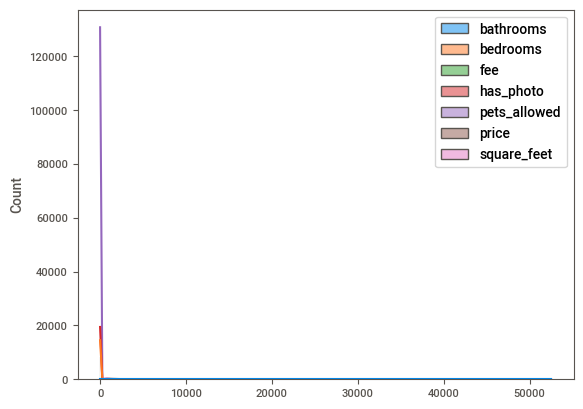

In [ ]:
#melihat distribusi data apakah gaussian atau tidak
sns.histplot(df1, kde=True)
plt.show()

In [ ]:
#memisahkan fitur dan target
Y = df1['square_feet']
X = df1.drop('square_feet', axis=1)
X

,bathrooms,bedrooms,fee,has_photo,pets_allowed,price
0,1.0,1.0,0,1,1,2195.0
1,1.5,3.0,0,1,3,1250.0
2,2.0,3.0,0,1,0,1395.0
3,1.0,2.0,0,1,3,1600.0
4,1.0,1.0,0,1,3,975.0
...,...,...,...,...,...,...
8093,1.0,1.0,0,2,3,1635.0
8094,1.0,1.0,0,1,3,975.0
8095,2.0,2.0,0,2,3,1285.0
8096,2.0,3.0,0,2,3,1429.0


In [ ]:
df1['fee'] = df1['fee'].astype(int)
df1['has_photo'] = df1['has_photo'].astype(int)

### **ANN**

In [ ]:
# Model dasar
# Standarisasi dataset
PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()

# Menyimpan objek yang fit
PredictorScalerFit = PredictorScaler.fit(X)
Y_reshape = Y.values.reshape(-1,1)
TargetVarScalerFit = TargetVarScaler.fit(Y_reshape)

# Membuat standarisasi X dan Y
X=PredictorScalerFit.transform(X)
Y=TargetVarScalerFit.transform(Y_reshape)
X

array([[-0.57847073, -0.7607406 ,  0.        , -0.07625   , -0.7273785 ,
         0.63799394],
       [ 0.20856824,  1.24756499,  0.        , -0.07625   ,  0.73732649,
        -0.20052549],
       [ 0.99560722,  1.24756499,  0.        , -0.07625   , -1.459731  ,
        -0.07186378],
       ...,
       [ 0.99560722,  0.24341219,  0.        ,  7.1036632 ,  0.73732649,
        -0.16946922],
       [ 0.99560722,  1.24756499,  0.        ,  7.1036632 ,  0.73732649,
        -0.04169483],
       [ 0.99560722,  0.24341219,  0.        ,  7.1036632 ,  0.73732649,
        -0.06742717]])

In [ ]:
# Membagi data menjadi trainning dan test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)


In [ ]:
# Cek shape X dan Y
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5668, 6)
(5668, 1)
(2430, 6)
(2430, 1)


In [ ]:
# Model Exploration
# Function for explore the model hyper parameter
def modelExploration(X_train, Y_train, X_test, Y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[40, 80]
    epoch_list  =   [500, 1000]

    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=8, input_dim=6, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, Y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            Predictions=model.predict(X_test)
            Predictions=TargetVarScalerFit.inverse_transform(Predictions)
            y_test_orig=TargetVarScalerFit.inverse_transform(Y_test)
            Test_Data=PredictorScalerFit.inverse_transform(X_test)

            TestingData=pd.DataFrame(data=Test_Data, columns=['bathrooms','bedrooms','fee','has_photo','pets_allowed','price'])
            TestingData['square_feet']=y_test_orig
            TestingData['PredictedSquareFeet']=Predictions

            APE=100*(abs(TestingData['square_feet']-TestingData['PredictedSquareFeet'])/TestingData['square_feet'])
            TestingData['APE']=APE

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial)
            print(f'The Accuracy of ANN model {TrialNumber} is:', 100-np.mean(APE), "%")

# Calling the function
modelExploration(X_train, Y_train, X_test, Y_test)

76/76 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 40 - epochs: 500
The Accuracy of ANN model 1 is: 76.22170639038086 %
76/76 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 40 - epochs: 1000
The Accuracy of ANN model 2 is: 77.85556602478027 %
76/76 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 80 - epochs: 500
The Accuracy of ANN model 3 is: 77.72999382019043 %
76/76 [==============================] - 0s 1ms/step
4 Parameters: batch_size: 80 - epochs: 1000
The Accuracy of ANN model 4 is: 77.26749992370605 %


In [ ]:
# Model Exploration
# Function for explore the model hyper parameter
def modelExploration(X_train, Y_train, X_test, Y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[40, 80]
    epoch_list  =   [500, 1000]

    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=8, input_dim=6, kernel_initializer='normal', activation='tanh'))

            # Defining the Second layer of the model
            model.add(Dense(units=8, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, Y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            Predictions=model.predict(X_test)
            Predictions=TargetVarScalerFit.inverse_transform(Predictions)
            y_test_orig=TargetVarScalerFit.inverse_transform(Y_test)
            Test_Data=PredictorScalerFit.inverse_transform(X_test)

            TestingData=pd.DataFrame(data=Test_Data, columns=['bathrooms','bedrooms','fee','has_photo','pets_allowed','price'])
            TestingData['square_feet']=y_test_orig
            TestingData['PredictedSquareFeet']=Predictions

            APE=100*(abs(TestingData['square_feet']-TestingData['PredictedSquareFeet'])/TestingData['square_feet'])
            TestingData['APE']=APE

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial)
            print(f'The Accuracy of ANN model {TrialNumber} is:', 100-np.mean(APE), "%")

# Calling the function
modelExploration(X_train, Y_train, X_test, Y_test)

76/76 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 40 - epochs: 500
The Accuracy of ANN model 1 is: 76.9967155456543 %
76/76 [==============================] - 0s 1ms/step
2 Parameters: batch_size: 40 - epochs: 1000
The Accuracy of ANN model 2 is: 77.80171585083008 %
76/76 [==============================] - 0s 1ms/step
3 Parameters: batch_size: 80 - epochs: 500
The Accuracy of ANN model 3 is: 76.33466720581055 %
76/76 [==============================] - 0s 3ms/step
4 Parameters: batch_size: 80 - epochs: 1000
The Accuracy of ANN model 4 is: 76.82620048522949 %


In [ ]:
# Model Exploration
# Function for explore the model hyper parameter
def modelExploration(X_train, Y_train, X_test, Y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[40, 80]
    epoch_list  =   [500, 1000]

    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=8, input_dim=6, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=8, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, Y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            Predictions=model.predict(X_test)
            Predictions=TargetVarScalerFit.inverse_transform(Predictions)
            y_test_orig=TargetVarScalerFit.inverse_transform(Y_test)
            Test_Data=PredictorScalerFit.inverse_transform(X_test)

            TestingData=pd.DataFrame(data=Test_Data, columns=['bathrooms','bedrooms','fee','has_photo','pets_allowed','price'])
            TestingData['square_feet']=y_test_orig
            TestingData['PredictedSquareFeet']=Predictions

            APE=100*(abs(TestingData['square_feet']-TestingData['PredictedSquareFeet'])/TestingData['square_feet'])
            TestingData['APE']=APE

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial)
            print(f'The Accuracy of ANN model {TrialNumber} is:', 100-np.mean(APE), "%")

# Calling the function
modelExploration(X_train, Y_train, X_test, Y_test)

76/76 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 40 - epochs: 500
The Accuracy of ANN model 1 is: 76.83687019348145 %
76/76 [==============================] - 0s 1ms/step
2 Parameters: batch_size: 40 - epochs: 1000
The Accuracy of ANN model 2 is: 76.5560245513916 %
76/76 [==============================] - 0s 1ms/step
3 Parameters: batch_size: 80 - epochs: 500
The Accuracy of ANN model 3 is: 76.72832298278809 %
76/76 [==============================] - 0s 1ms/step
4 Parameters: batch_size: 80 - epochs: 1000
The Accuracy of ANN model 4 is: 76.88640594482422 %


In [ ]:
# Evaluation
# Training the ANN model with the best parameters
model = Sequential()
model.add(Dense(units=8, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train ,batch_size = 40, epochs = 500, verbose=1)

Epoch 1/500
95/95 [==============================] - 1s 2ms/step - loss: 0.5877
Epoch 2/500
95/95 [==============================] - 0s 2ms/step - loss: 0.3291
Epoch 3/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1686
Epoch 4/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1580
Epoch 5/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1555
Epoch 6/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1537
Epoch 7/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1521
Epoch 8/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1511
Epoch 9/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1500
Epoch 10/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1500
Epoch 11/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1489
Epoch 12/500
95/95 [==============================] - 0s 2ms/step - loss: 0.1476
Epoch 13/500
95/95 [=================

In [ ]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted square_feet data back to original square_feet scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the Y_test square_feet data back to original square_feet scale
y_test_orig=TargetVarScalerFit.inverse_transform(Y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=['bathrooms','bedrooms','fee','has_photo','pets_allowed','square_feet'])
TestingData['square_feet']=y_test_orig
TestingData['PredictedSquareFeet']=Predictions
TestingData

76/76 [==============================] - 0s 1ms/step


,bathrooms,bedrooms,fee,has_photo,pets_allowed,square_feet,PredictedSquareFeet
0,2.0,3.0,0.0,1.0,3.000000e+00,1600.000000,1379.225952
1,1.0,1.0,0.0,1.0,2.961831e-08,629.000000,603.567078
2,1.0,1.0,0.0,1.0,3.000000e+00,500.000031,662.823914
3,1.0,1.0,0.0,1.0,3.000000e+00,872.000000,766.499878
4,2.0,2.0,0.0,1.0,3.000000e+00,1153.000000,1127.727417
...,...,...,...,...,...,...,...
2425,1.0,2.0,0.0,1.0,3.000000e+00,622.000000,787.828918
2426,2.5,3.0,0.0,1.0,3.000000e+00,1550.000000,1747.040649
2427,1.0,2.0,0.0,1.0,2.961831e-08,843.000000,720.795532
2428,2.0,2.0,0.0,1.0,3.000000e+00,1552.000000,1161.825562


In [ ]:
# Finding the accuracy of the model
# Computing the absolute percent error
APE=100*(abs(TestingData['square_feet']-TestingData['PredictedSquareFeet'])/TestingData['square_feet'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData

The Accuracy of ANN model is: 77.19864845275879


,bathrooms,bedrooms,fee,has_photo,pets_allowed,square_feet,PredictedSquareFeet,APE
0,2.0,3.0,0.0,1.0,3.000000e+00,1600.000000,1379.225952,13.798378
1,1.0,1.0,0.0,1.0,2.961831e-08,629.000000,603.567078,4.043390
2,1.0,1.0,0.0,1.0,3.000000e+00,500.000031,662.823914,32.564774
3,1.0,1.0,0.0,1.0,3.000000e+00,872.000000,766.499878,12.098638
4,2.0,2.0,0.0,1.0,3.000000e+00,1153.000000,1127.727417,2.191898
...,...,...,...,...,...,...,...,...
2425,1.0,2.0,0.0,1.0,3.000000e+00,622.000000,787.828918,26.660597
2426,2.5,3.0,0.0,1.0,3.000000e+00,1550.000000,1747.040649,12.712299
2427,1.0,2.0,0.0,1.0,2.961831e-08,843.000000,720.795532,14.496379
2428,2.0,2.0,0.0,1.0,3.000000e+00,1552.000000,1161.825562,25.140106


In [ ]:
my_report = sv.analyze(TestingData)

                                             |          | [  0%]   00:00 -> (? left)


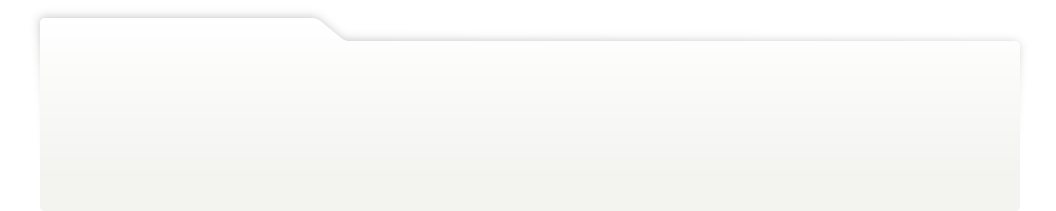
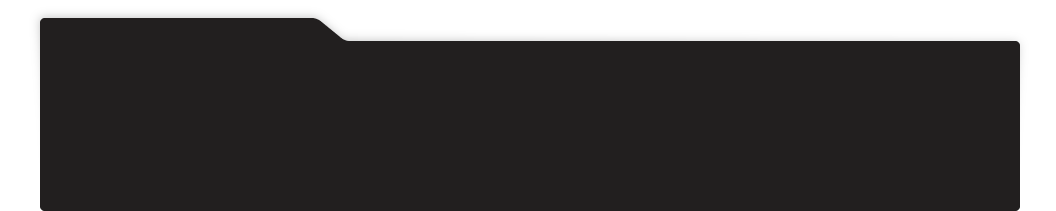
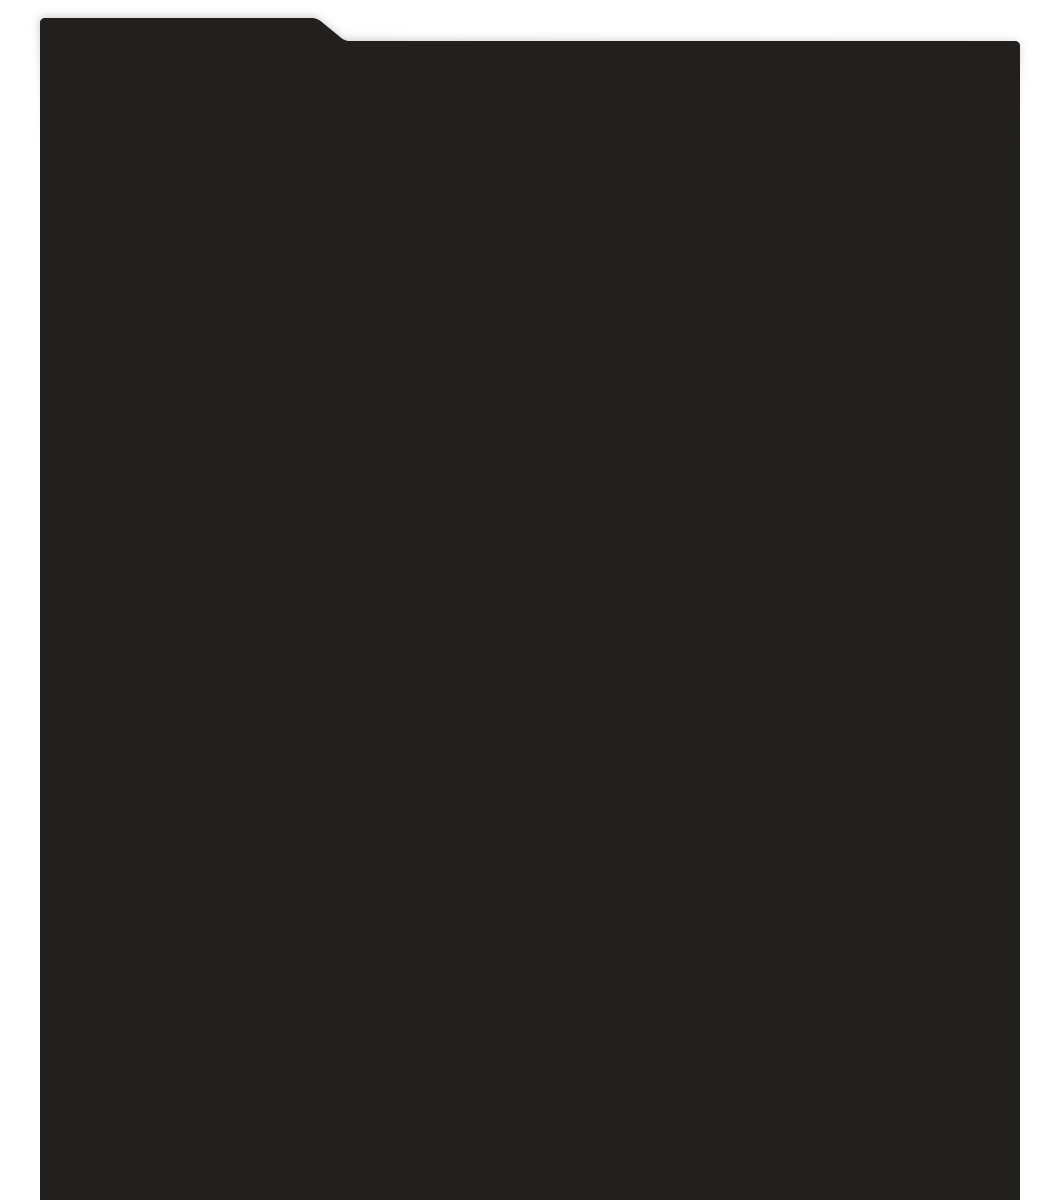
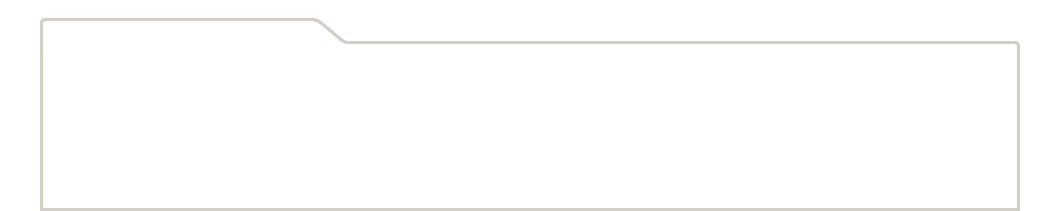
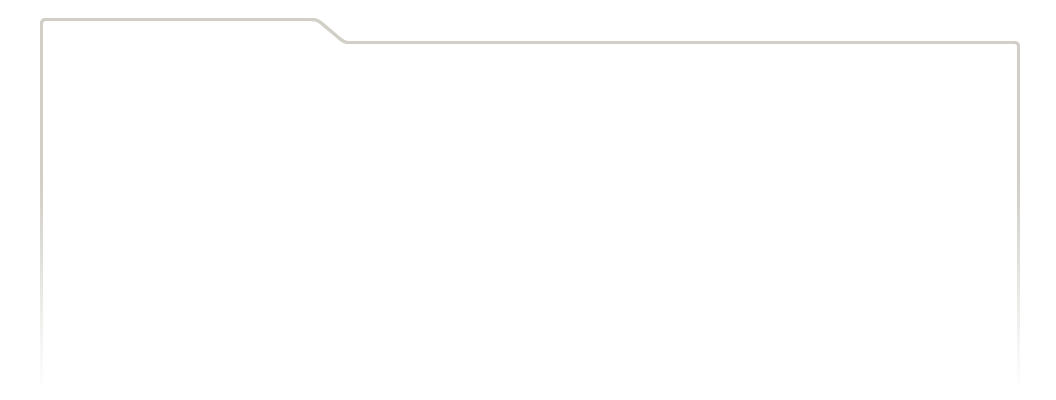
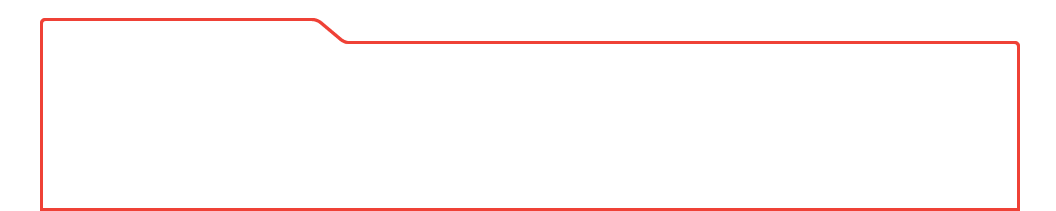
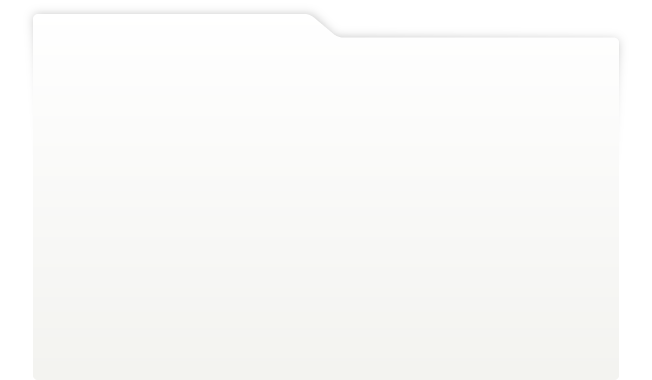
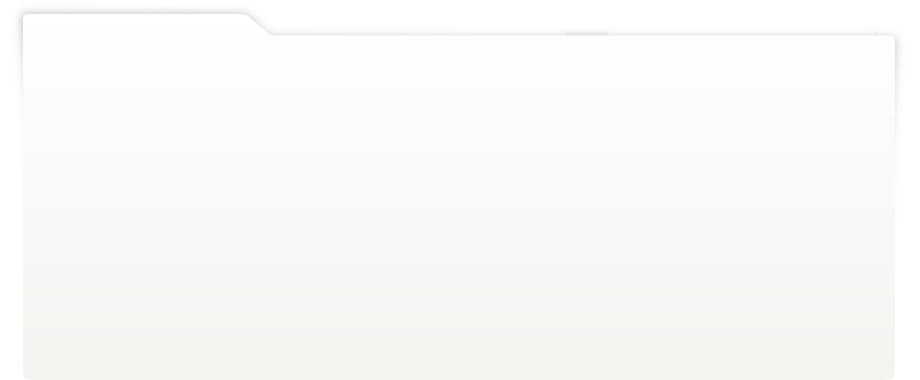
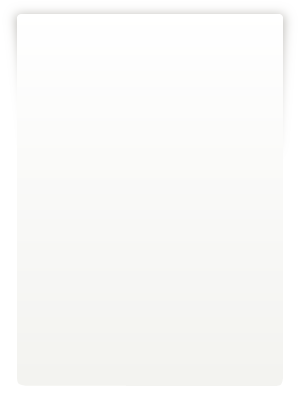
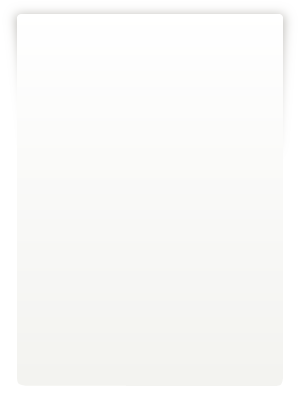
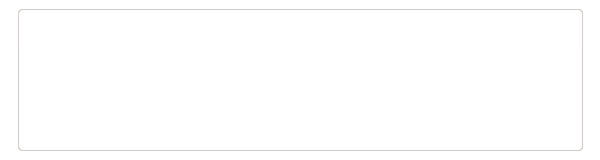
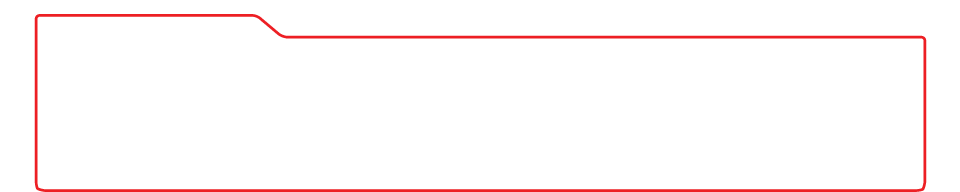
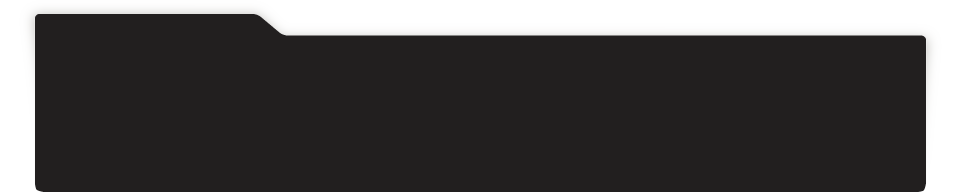
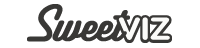
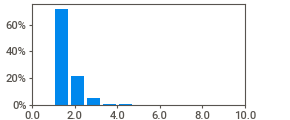
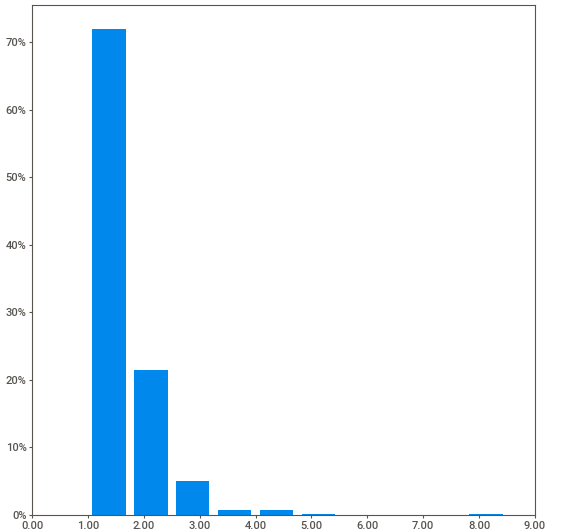
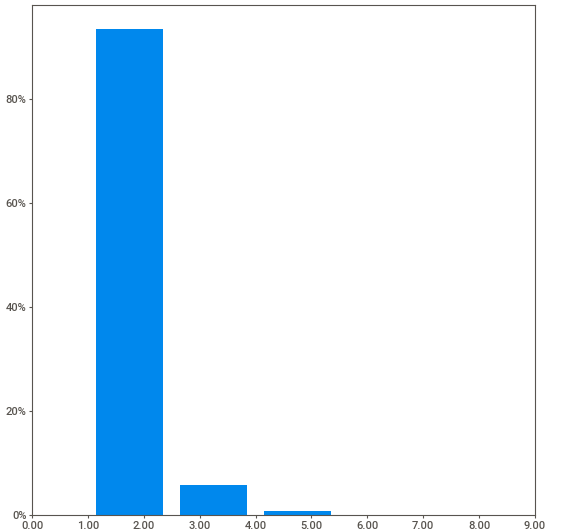
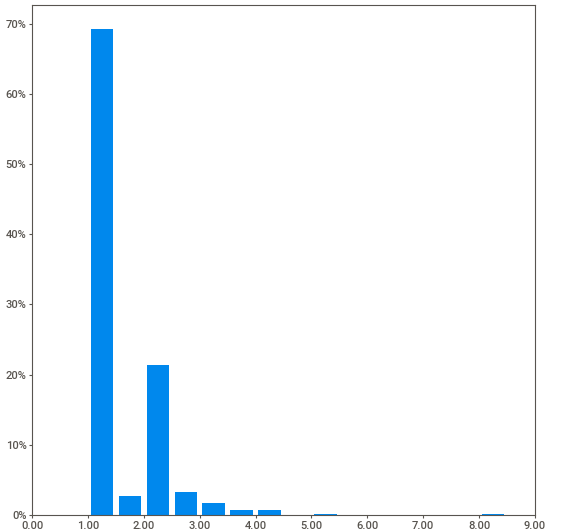
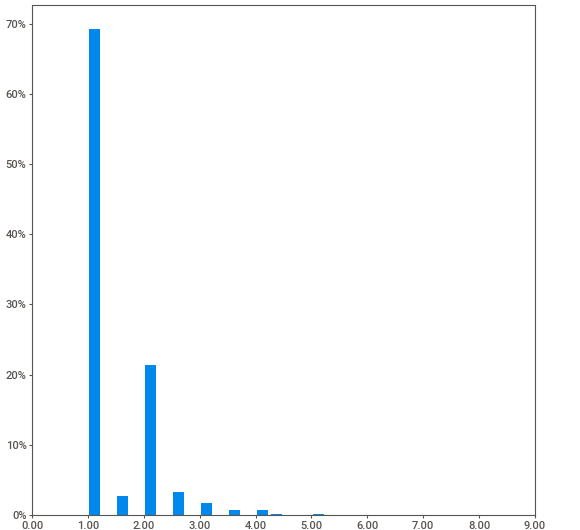
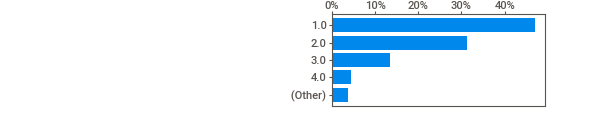
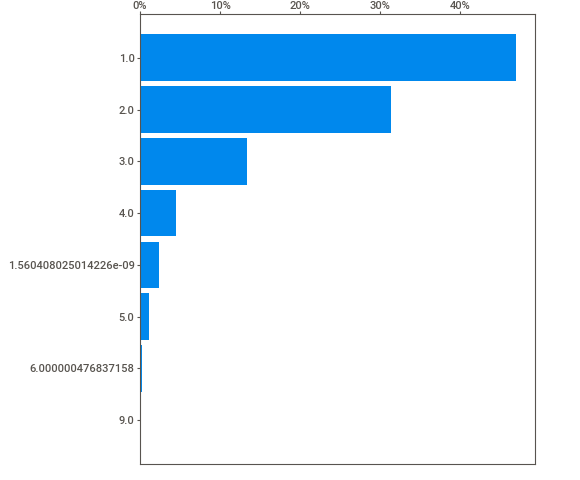
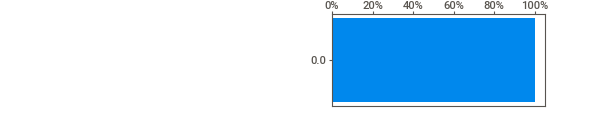
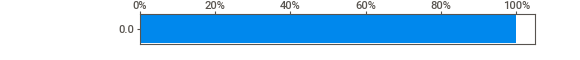
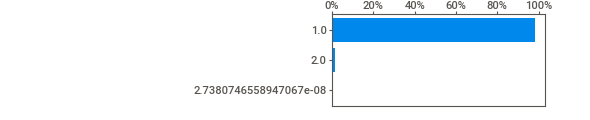
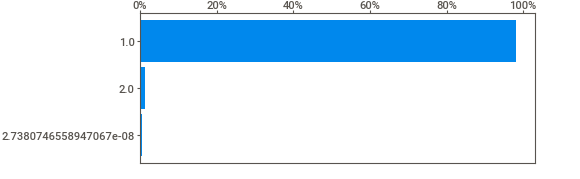
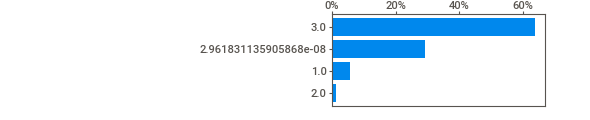
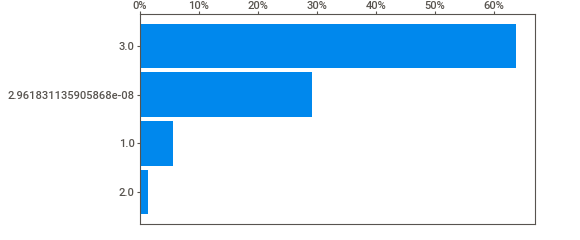
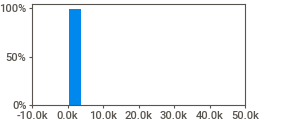
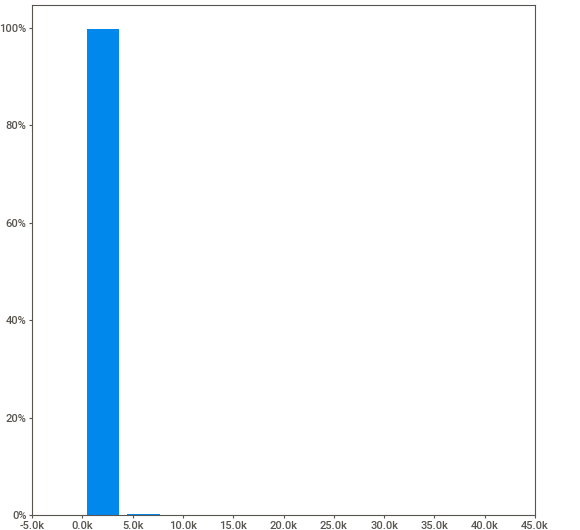
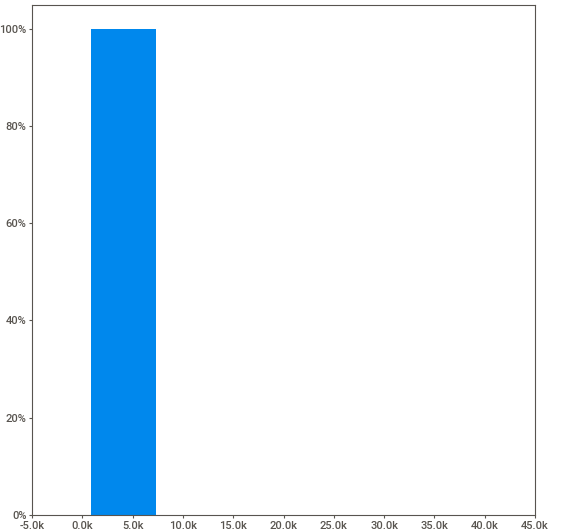
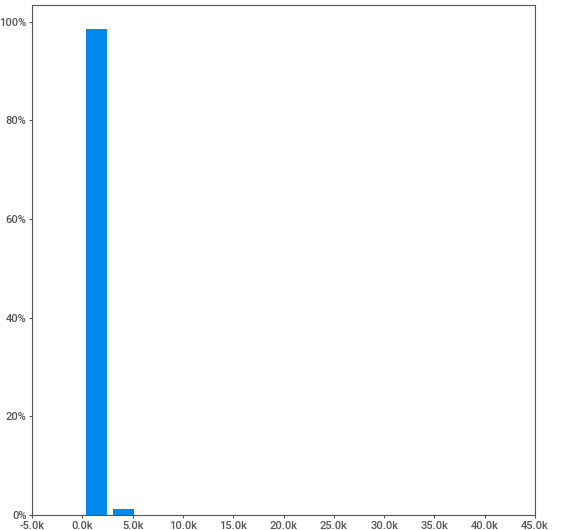
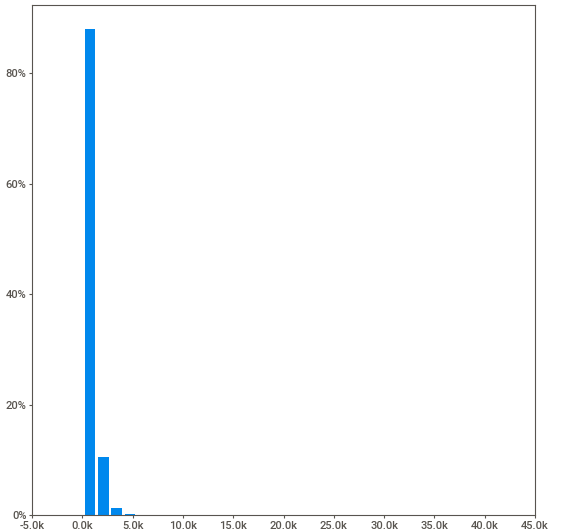
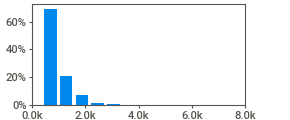
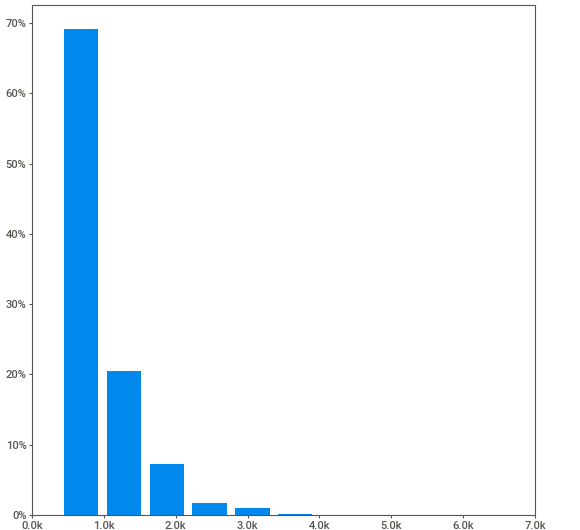
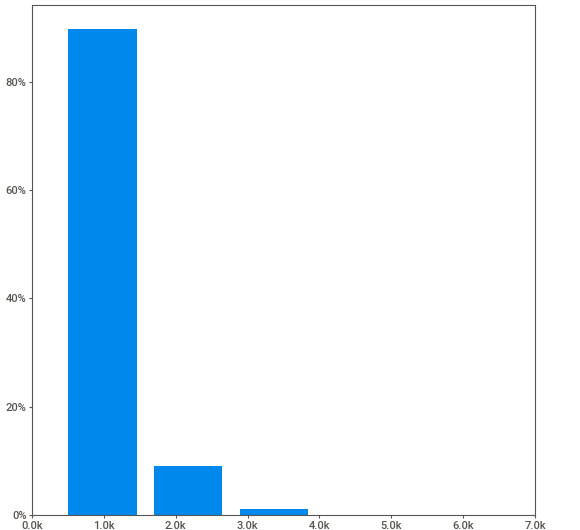
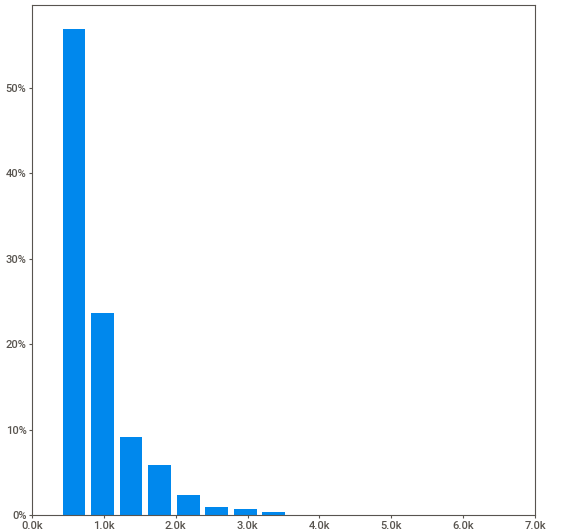
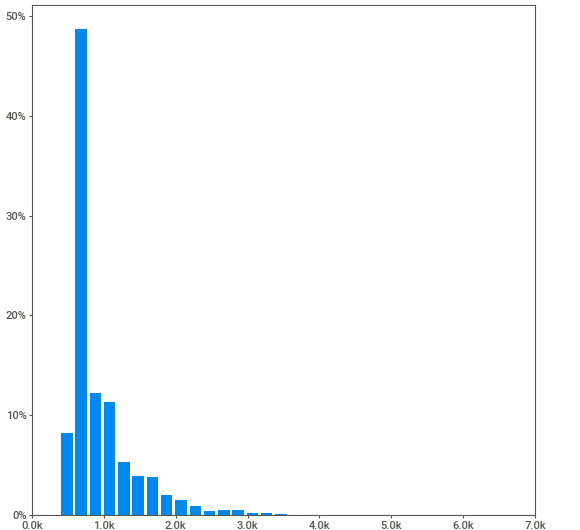
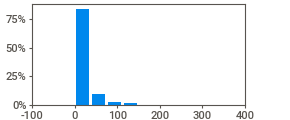
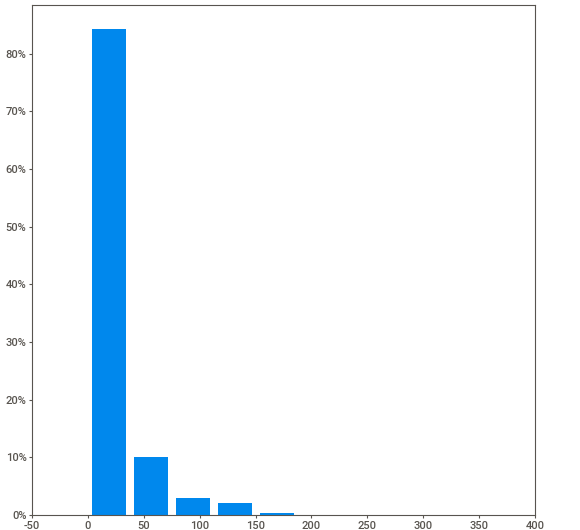
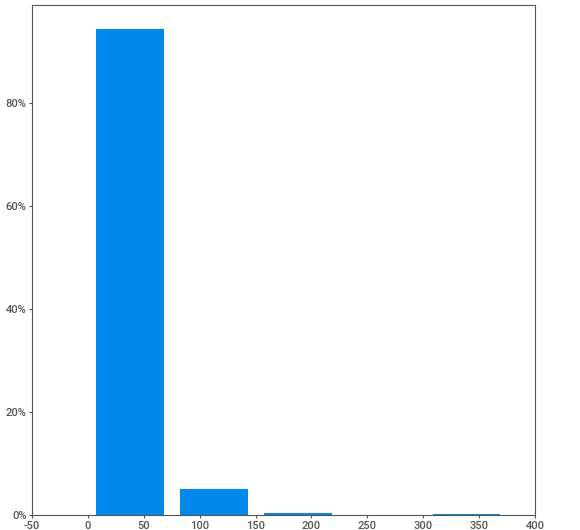
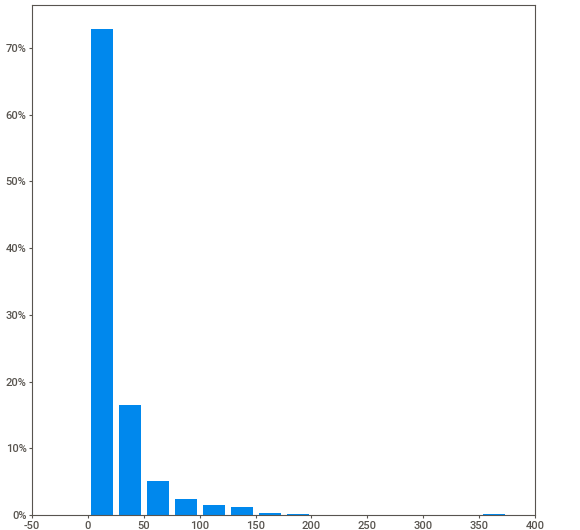
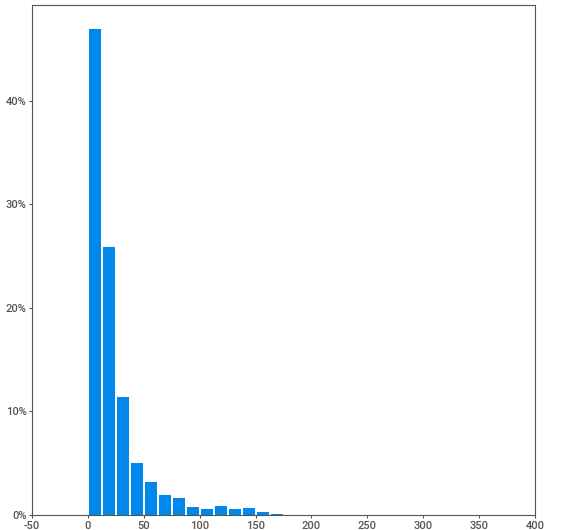
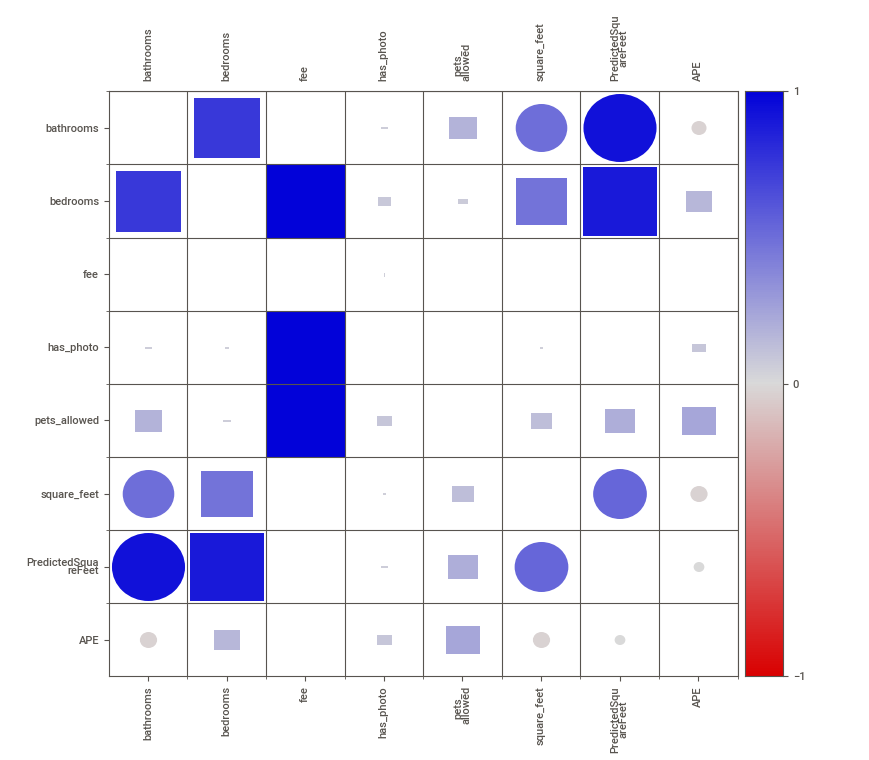
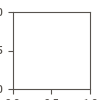

In [ ]:
my_report.show_notebook(w=None, h=None, scale=0.9, layout='widescreen', filepath=None)

## **Hasil dan Analisis**

Dalam evaluasi ini, kami menggunakan Mean Squared Error (MSE) untuk menganalisis model pada "Dataset of classified for apartment for rent in USA". MSE mengukur seberapa baik model ANN dapat memprediksi luas apartemen (square feet). Semakin kecil MSE, semakin baik modelnya.

Berdasarkan eksperimen yang telah dilakukan, nilai MSE yang didapatkan yaitu 0.1 dimana nilai MSE rendah. Dimana nilai MSE rendah karena mendekati nol, ini menunjukkan bahwa model memiliki tingkat akurasi yang tinggi dalam memprediksi luas apartemen.

## **Kesimpulan**

Berdasarkan hasil analisis kami, dapat disimpulkan bahwa model ANN yang dikembangkan dalam eksperimen memiliki kinerja yang memuaskan dalam tugas prediksi luas apartment pada dataset tersebut. Hasil ini memberikan keyakinan bahwa model dapat digunakan secara efektif dalam membantu pemilik properti, calon penyewa, atau pihak terkait lainnya untuk memahami dan memprediksi luas apartment yang terdaftar dalam iklan properti.